In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


stock_symbol = 'INFY'  
stock_data = yf.download(stock_symbol, start='2020-01-01', end='2023-01-01')


y = stock_data['Close'].values.reshape(-1, 1)


X = np.zeros_like(y)
X[1:] = y[:-1] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)


[*********************100%%**********************]  1 of 1 completed

Train RMSE: 0.5355238567296641
Test RMSE: 0.3266024740332186
Train R^2 Score: 0.9875021986146748
Test R^2 Score: 0.9957246425853757


In [41]:
infy_df

,Open,High,Low,Close,Volume
Date,,,,,
1999-03-11 00:00:00-05:00,0.385778,0.516091,0.385778,0.483835,172512000
1999-03-12 00:00:00-05:00,0.485125,0.503189,0.443838,0.481255,39897600
1999-03-15 00:00:00-05:00,0.482545,0.482545,0.434806,0.437387,12672000
1999-03-16 00:00:00-05:00,0.441258,0.456740,0.433516,0.433516,9984000
1999-03-17 00:00:00-05:00,0.433516,0.461901,0.430936,0.436097,15449600
...,...,...,...,...,...
2024-03-26 00:00:00-04:00,17.709999,17.820000,17.639999,17.750000,10500900
2024-03-27 00:00:00-04:00,17.830000,17.840000,17.680000,17.790001,6074600
2024-03-28 00:00:00-04:00,17.790001,17.990000,17.790001,17.930000,7019600


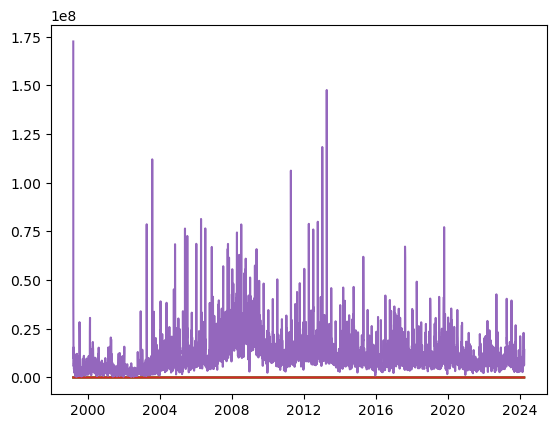

In [42]:
plt.plot(infy_df)

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(np.array(close_data_infy).reshape(-1, 1))
for i in df:
    print(i)

[0.00289039]
[0.0027853]
[0.00099849]
[0.00084085]
[0.00094595]
[0.00126127]
[0.00084085]
[0.00094595]
[0.00015766]
[0.00031533]
[0.00094595]
[0.00225976]
[0.00246998]
[0.00225976]
[0.00131382]
[0.00073575]
[0.00147149]
[0.00070946]
[0.00126127]
[0.00199701]
[0.00168168]
[0.00160285]
[0.0007883]
[0.0007883]
[0.0007883]
[0.00147149]
[0.00084085]
[0.00010511]
[0.]
[0.00136637]
[0.00110362]
[0.00089339]
[0.]
[0.]
[0.00010511]
[0.00055181]
[0.00084085]
[0.0006832]
[0.00086714]
[0.00120872]
[0.00173424]
[0.00120872]
[0.00110362]
[0.00126127]
[0.00168168]
[0.00157659]
[0.0014452]
[0.00084085]
[0.00126127]
[0.00236488]
[0.00257508]
[0.0031006]
[0.00404657]
[0.00436187]
[0.00399402]
[0.00409911]
[0.00421182]
[0.00415925]
[0.00400154]
[0.00405411]
[0.00494783]
[0.00678782]
[0.00389638]
[0.00547353]
[0.0055261]
[0.00592041]
[0.0050004]
[0.00589411]
[0.00652498]
[0.00852268]
[0.00825985]
[0.00652498]
[0.00783927]
[0.0075764]
[0.00815469]
[0.0075764]
[0.00762897]
[0.0075764]
[0.0075764]
[0.0073135

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


linear_model = Sequential()
linear_model.add(Dense(1, input_shape=(100,)))  

C:\Users\viraj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])


AttributeError: 'LinearRegression' object has no attribute 'compile'

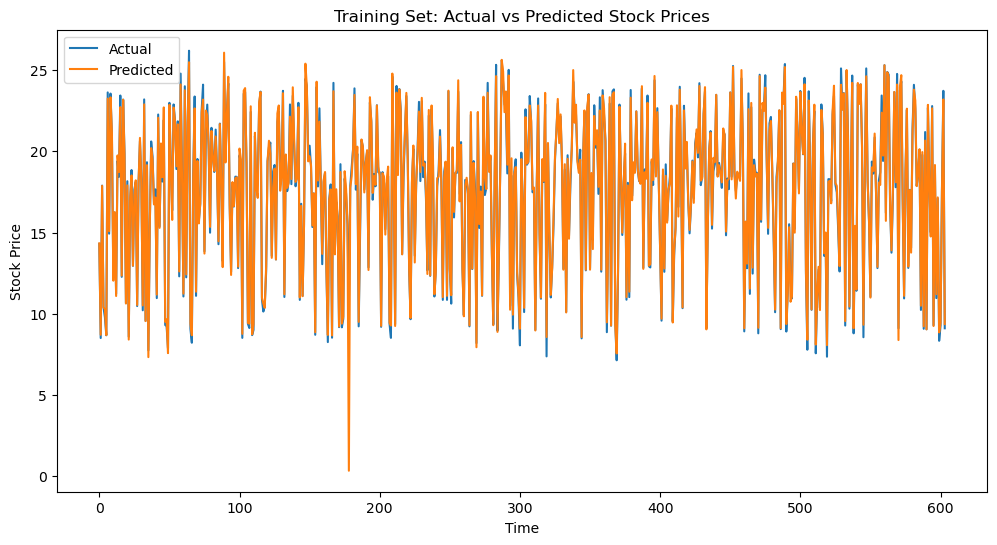

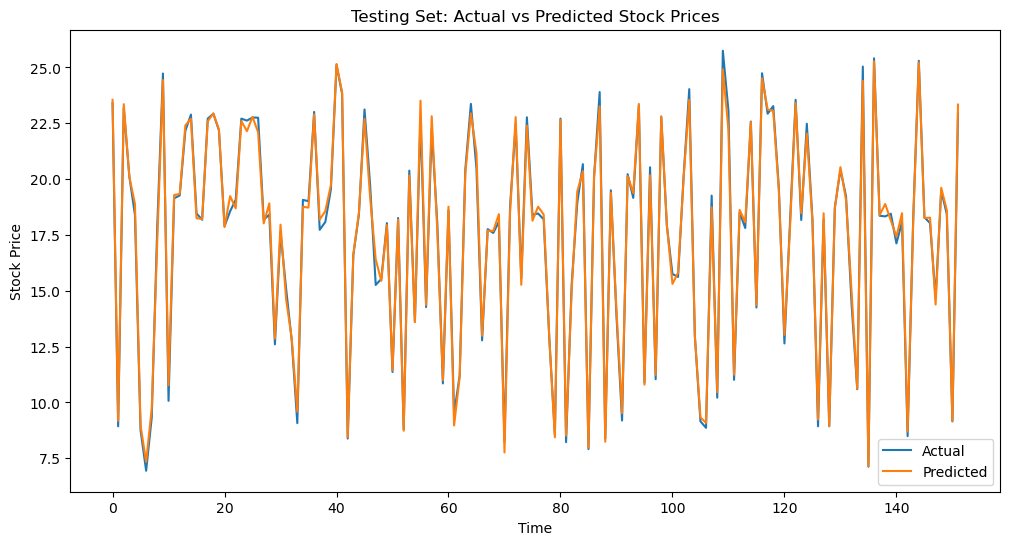

In [46]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.title('Training Set: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Testing Set: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Cross-validated RMSE scores: [nan nan nan nan nan]
Mean RMSE: nan
Train RMSE: 0.5355238567296641
Test RMSE: 0.3266024740332186
Train R^2 Score: 0.9875021986146748
Test R^2 Score: 0.9957246425853757


C:\Users\viraj\AppData\Local\Temp\ipykernel_4320\3411389011.py:15: RuntimeWarning: invalid value encountered in sqrt
  print("Cross-validated RMSE scores:", np.sqrt(-scores))
C:\Users\viraj\AppData\Local\Temp\ipykernel_4320\3411389011.py:16: RuntimeWarning: invalid value encountered in sqrt
  print("Mean RMSE:", np.sqrt(-scores.mean()))


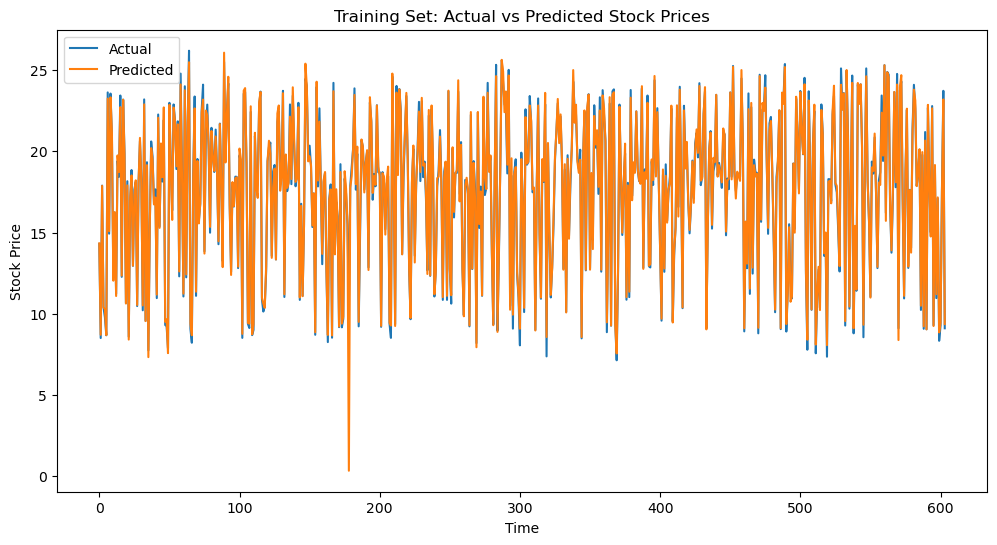

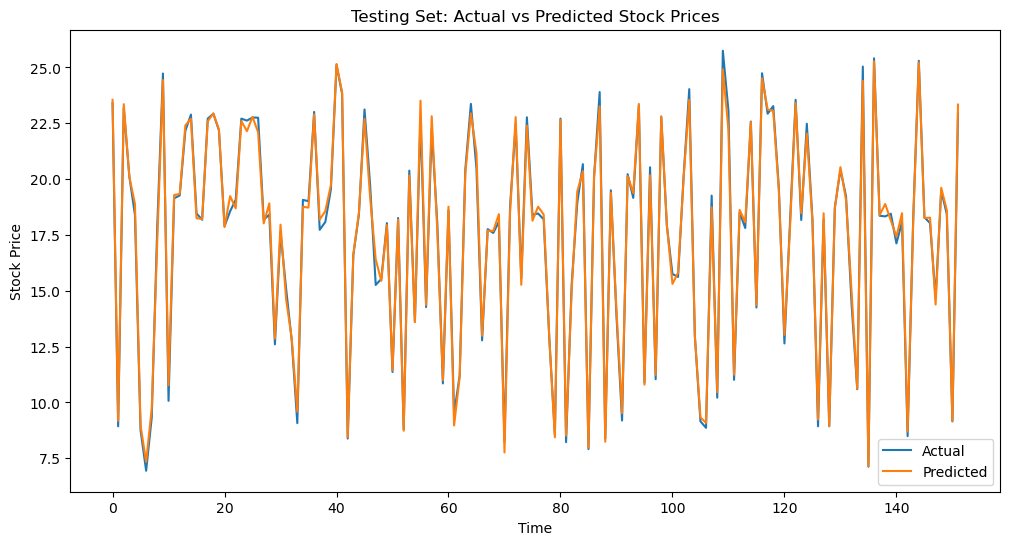

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation
print("Cross-validated RMSE scores:", np.sqrt(-scores))
print("Mean RMSE:", np.sqrt(-scores.mean()))


model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting the training set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.title('Training Set: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plotting the testing set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Testing Set: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = stock_data[['Volume', 'High', 'Low']]  
y = stock_data['Close'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')
print(f'Training R^2 score: {r2_train}')
print(f'Testing R^2 score: {r2_test}')


Training RMSE: 0.1187602180957547
Testing RMSE: 0.13015394714640408
Training R^2 score: 0.9993853640675502
Testing R^2 score: 0.9993210337711727


In [49]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

In [51]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.016940049957788944
R^2 Score: 0.9993210337711727


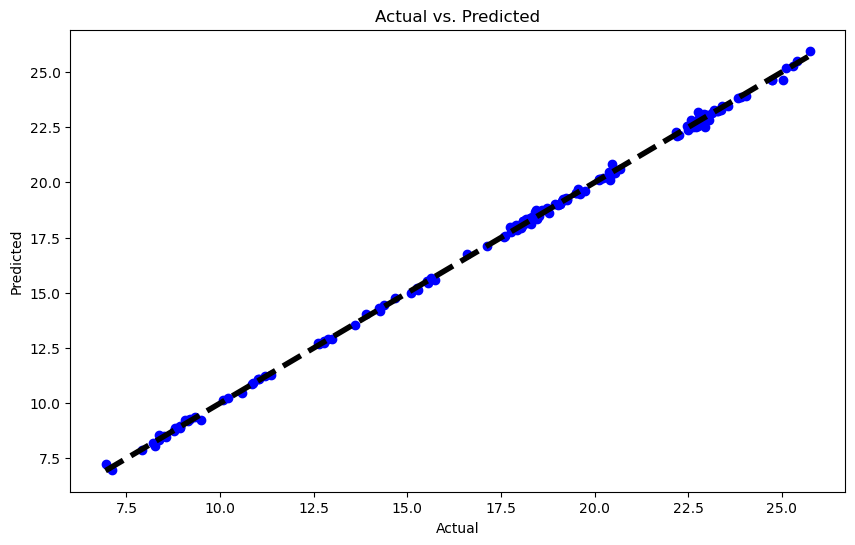

In [52]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [53]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error (MSE): 0.016940049957788944
R-squared (R2) score: 0.9993210337711727


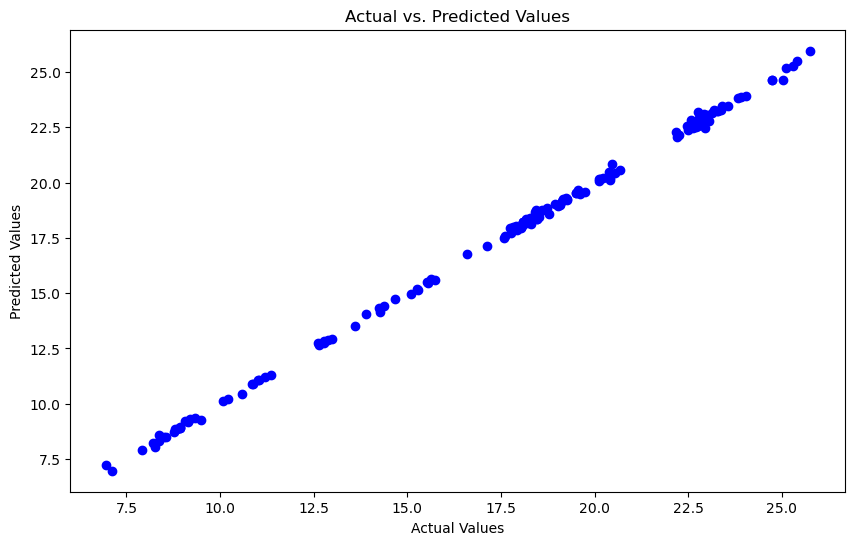

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


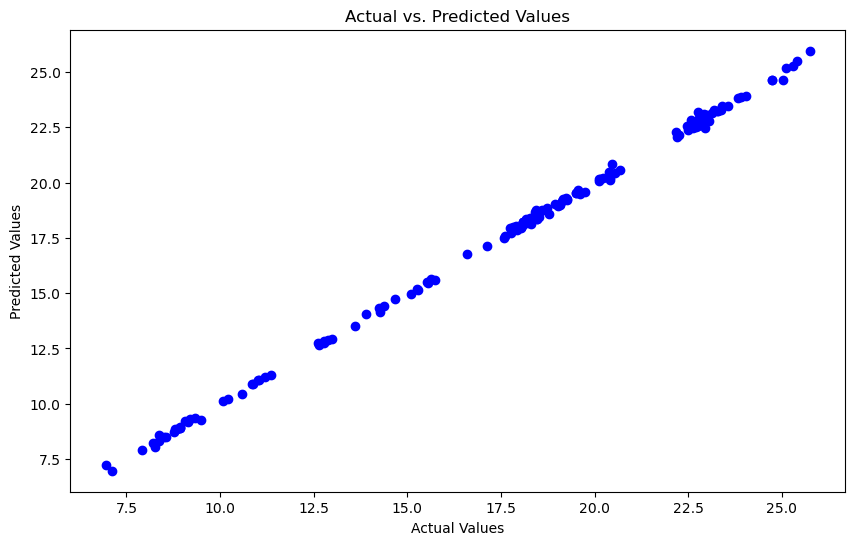

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
